In [1]:
# Requires the following packages: seaborn, pandas, pandas_datareader, matplotlib

import numpy as np
import scipy.cluster.hierarchy as sch
import datetime

import matplotlib.pyplot as plt
import seaborn

import lpa
import sys

sys.path.insert(0, '../datasets/finance/')
from finance_dataset import get_dataset

%matplotlib inline
#seaborn.set(font='Helvetica')
seaborn.set_style('white')
seaborn.set_style("ticks")

In [2]:
T_train,X_train,T_val,X_val,T_test,X_test = get_dataset()

2610


../datasets/finance/finance_dataset.py:89: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  for i in range(X.shape[0])])


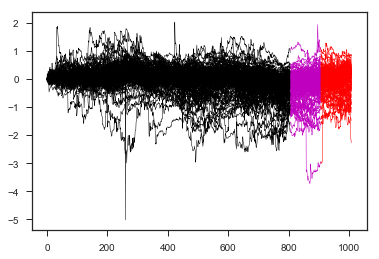

In [7]:
# Lets plot the data over time
m = X_train.shape[0]

for i in range(200):
    plt.plot(T_train, X_train[i,:], 'k', linewidth=0.5)
    plt.plot(T_val, X_val[i,:], 'm', linewidth=0.5)
    plt.plot(T_test, X_test[i,:], 'r', linewidth=0.5)
plt.show()

In [3]:
# Let's fit a standard vector autoregressive model
n_lags = 2
va = lpa.VAR(n_lags)
va.fit(X_train)
train_err = va.one_step_rmse(X_train)
val_err = va.one_step_rmse(X_val)
test_err = va.one_step_rmse(X_test)

print(train_err, val_err, test_err)

>>Extracting data from time series
>>Fitting vector autoregressive processe
(8.9051541308076723e-07, 17.737500516859662, 22.159500933280796)


In [4]:
n_components = 50
n_lags = 2
lp = lpa.LPA(n_components,n_lags,verbose=True,basis='unstructured',approximate=False)
X_lat = lp.fit_predict_latent(X_train)
train_err = lp.one_step_rmse(X_train)
val_err = lp.one_step_rmse(X_val)
test_err = lp.one_step_rmse(X_test)

print(train_err, val_err, test_err)

>>Extracting data from time series
>>Identifying latent processes
>> Beginning seed: 0
Iteration:      0 | loss 180.083
Iteration:    100 | loss 7.411
Iteration:    127 | loss 7.263
>> Beginning seed: 1
Iteration:      0 | loss 179.815
Iteration:    100 | loss 7.575
>> Beginning seed: 2
Iteration:      0 | loss 179.294
Iteration:     95 | loss 7.387
>> Beginning seed: 3
Iteration:      0 | loss 179.592
Iteration:     77 | loss 7.369
>> Beginning seed: 4
Iteration:      0 | loss 179.888
Iteration:    100 | loss 8.241
Iteration:    168 | loss 7.576
>>Leaving basis unstructured
(2.6949642780196097, 12.768913838784011, 16.667574706075534)


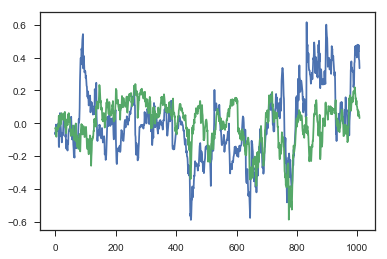

In [13]:
for i in range(n_components):
    plt.plot(times, X_lat[i,:])
plt.show()

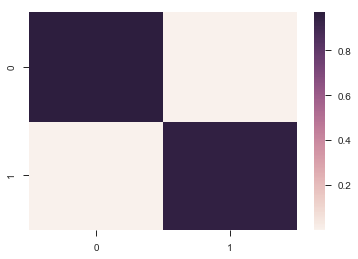

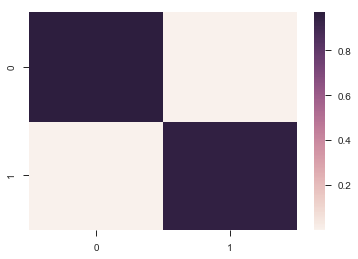

In [14]:
W,A,b = lp.get_model_params()
seaborn.heatmap(np.mean(A,axis=0))
plt.show()
seaborn.heatmap(A[0])
plt.show()

In [38]:
np.linalg.norm(A)

1.6663001440900269